[View in Colaboratory](https://colab.research.google.com/github/Nourahussein/Plant-seedling-classification/blob/master/FINAL_seedling.ipynb)

**step1:** Download data from [kaggle](https://www.kaggle.com/c/plant-seedlings-classification)  in train.zip file 

**step 2 :**  extract files and see its contents

You have to update this link if you use this notebook 

In [50]:
url="/home/ck/datasets/"

In [51]:
!ls

sample_submission.csv  test.zip  train	train1	train.zip


In [52]:
cd /home/ck/datasets

/home/ck/datasets


In [53]:
from urllib import request
file_name = "train.zip"


# **Unziping train file**

In [54]:
# import zipfile as zf
# train_zip = zf.ZipFile(file_name)
# train_zip.extractall()
# !ls

show the dirctoris in train

In [55]:
#see contents of train file
!ls train


 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [56]:
#change dirctory 
#import os 
#os.chdir("train")
#cwd = os.getcwd()


In [57]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


In [58]:
#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "train"

 **Read images and remove missing values** 
 save images in **images** list

In [59]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
        
        

number of all images

In [60]:
len(images)

4750

**resizing images**

In [61]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
#   print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res
#resized=[]
#for image in images:
#  ressized= resize_images(images[image])

In [62]:
#save resized images into images.
images = [resize_images(img) for img in images]

In [63]:
images[0].shape

(256, 256, 3)

#number of images in each class 

In [64]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
        
  


images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Loose Silky-bent images is  -> 654
number of Scentless Mayweed images is  -> 516
number of Fat Hen images is  -> 475
number of Common Chickweed images is  -> 611
number of Small-flowered Cranesbill images is  -> 496
number of Black-grass images is  -> 263
number of Cleavers images is  -> 287
number of Charlock images is  -> 390
number of Common wheat images is  -> 221
number of Shepherds Purse images is  -> 231
number of Sugar beet images is  -> 385
number of Maize images is  -> 221


# plot the distrbution of number of images

Text(0.5, 0.98, 'Categorical Plotting')

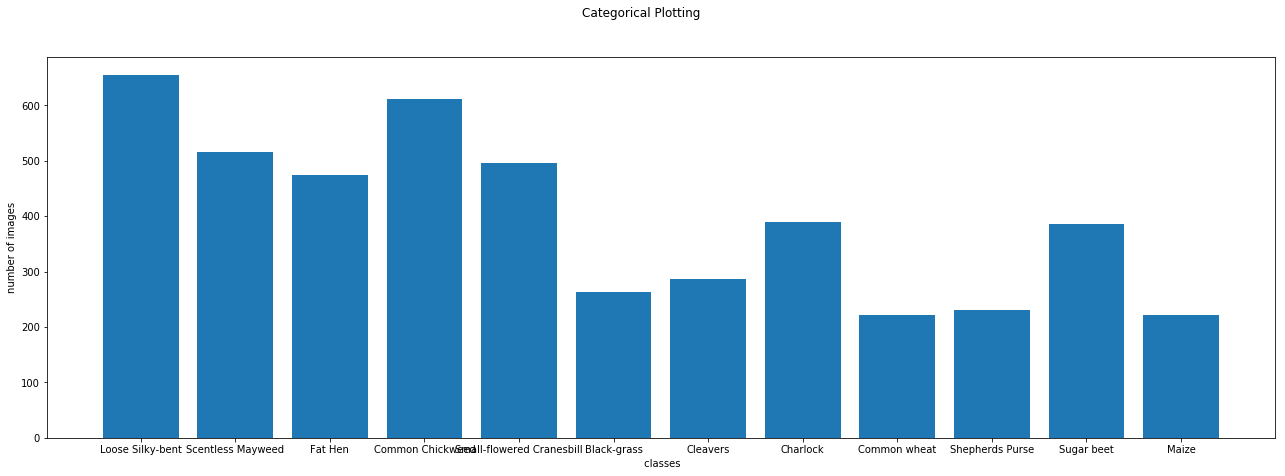

In [65]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

# look at image after resize

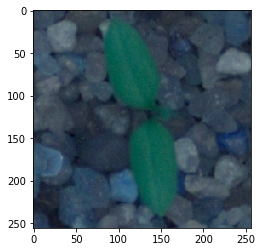

In [66]:
plt.imshow(images[50])


# data Exploration  

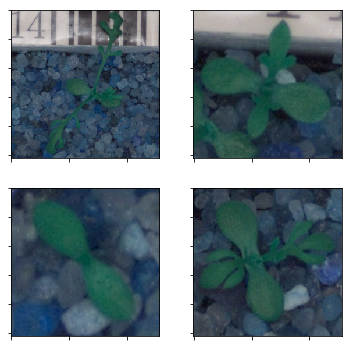

In [67]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [68]:
!ls "train/Scentless Mayweed" 

img = cv2.imread("train/Scentless Mayweed/2bdd11146.png")


01358344b.png  2de4ec934.png  61974ff26.png  8f2534b22.png  c013688a9.png
015215883.png  2e25a0433.png  61a79f4a1.png  8f63f6073.png  c0810829c.png
01e90ef62.png  2e2bb8089.png  620457a5f.png  8fdd4fc59.png  c13cfa6ca.png
025155400.png  2e4ae28f4.png  6256740a1.png  8fed2b599.png  c24269f00.png
0258481da.png  2f2e95f3a.png  628b08c82.png  8ff65b054.png  c2c5708be.png
02ae4e8a3.png  2f7452cdd.png  62d1b63f3.png  911a91de2.png  c4732c9bf.png
0372b48e1.png  2f998af91.png  6334e8b6d.png  9151d1f37.png  c4cfb9893.png
03906fdd7.png  2fe02f029.png  6398c3458.png  92e4b5803.png  c53eb8d52.png
03a92ad22.png  2fe0fea3e.png  63bbcaafe.png  936334172.png  c609814b6.png
03ee6340f.png  303b50030.png  64176476e.png  9469abe24.png  c6e95a334.png
0438cc647.png  304fb9580.png  64fb55b43.png  948251df3.png  c87695e0e.png
04dff1857.png  3059893a2.png  65148b580.png  94ba133c0.png  c895464a5.png
04f89976a.png  313242291.png  6540c684a.png  9524b09c2.png  c8c89b850.png
05ceff7d1.png  319667b0f.png  65532d3b

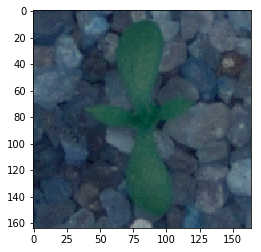

In [69]:
plt.imshow(img)

#Apply image processing on the images 
* convert image from RGB to HSV 
* Apply closing opration(one of mophological opration)
* Apply segmentation 
* Apply sharpening 

In [70]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp



# put all those functions together.

In [71]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

# itrate on all images

In [72]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      
    
  

# plot sample image to see diffrence before and after

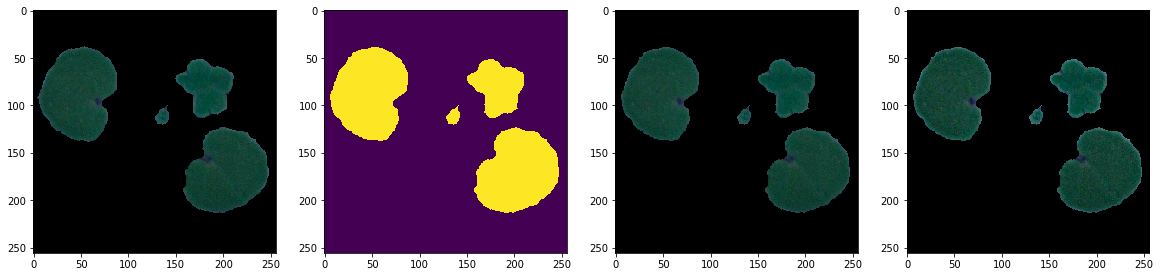

In [73]:
image = images[classes == "Small-flowered Cranesbill"][8]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

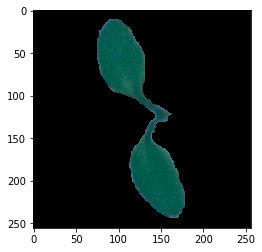

In [74]:
plt.imshow(images[111])

In [75]:
images.shape

(4750, 256, 256, 3)

# Label encoder 

In [76]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [77]:
y[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# Spliting data into training and testing set
* training set : 70%

*  testing set: 30% 

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [81]:
X_train.shape


(3325, 256, 256, 3)

# Create validarion set 
* split test data into 50% test, 50% validation

In [82]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [83]:
print(X_test.shape)
print(X_val.shape)

(356, 256, 256, 3)
(356, 256, 256, 3)



# CNN MODEL 


In [84]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 256, 32)      416       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 32)      4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 64)      16448     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [85]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# I'm using colab for good resaon  :D 
# I put epochs = 50 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
model.fit(X_train, y_train, epochs = 10, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 356 samples
Epoch 1/10
3325/3325 [==============================] - 5311s 2s/step - loss: 3.2987 - acc: 0.1844 - val_loss: 2.2485 - val_acc: 0.1882
Epoch 2/10
 736/3325 [=====>........................] - ETA: 8:45 - loss: 2.1326 - acc: 0.2826

In [44]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 50)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.483159065246582
Test accuracy: 0.15000000596046448


In [45]:
X_test.shape

(20, 256, 256, 3)

In [46]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 10
batch_size = 38

# **Data augmentation **

In [47]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [49]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
 - 22s - loss: 5.3142 - acc: 0.1053 - val_loss: 2.9646 - val_acc: 0.1429
Epoch 2/10
 - 17s - loss: 4.2827 - acc: 0.0589 - val_loss: 3.0422 - val_acc: 0.0000e+00
Epoch 3/10
 - 15s - loss: 3.6656 - acc: 0.1470 - val_loss: 2.7530 - val_acc: 0.1429
Epoch 4/10
 - 21s - loss: 3.2211 - acc: 0.1579 - val_loss: 2.6563 - val_acc: 0.1905
Epoch 5/10
 - 14s - loss: 2.9741 - acc: 0.1078 - val_loss: 2.6590 - val_acc: 0.1429
Epoch 6/10
 - 14s - loss: 3.1973 - acc: 0.0686 - val_loss: 2.6122 - val_acc: 0.0000e+00
Epoch 7/10
 - 18s - loss: 2.8661 - acc: 0.0658 - val_loss: 2.6294 - val_acc: 0.0000e+00

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/10
 - 14s - loss: 2.7955 - acc: 0.0834 - val_loss: 2.6048 - val_acc: 0.0476
Epoch 9/10
 - 14s - loss: 2.8461 - acc: 0.0637 - val_loss: 2.6095 - val_acc: 0.0476
Epoch 10/10
 - 18s - loss: 2.9011 - acc: 0.1184 - val_loss: 2.5966 - val_acc: 0.0476

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.000250

In [41]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.4506817952300725
Test accuracy: 0.8398876404494382


# Model Evaluation

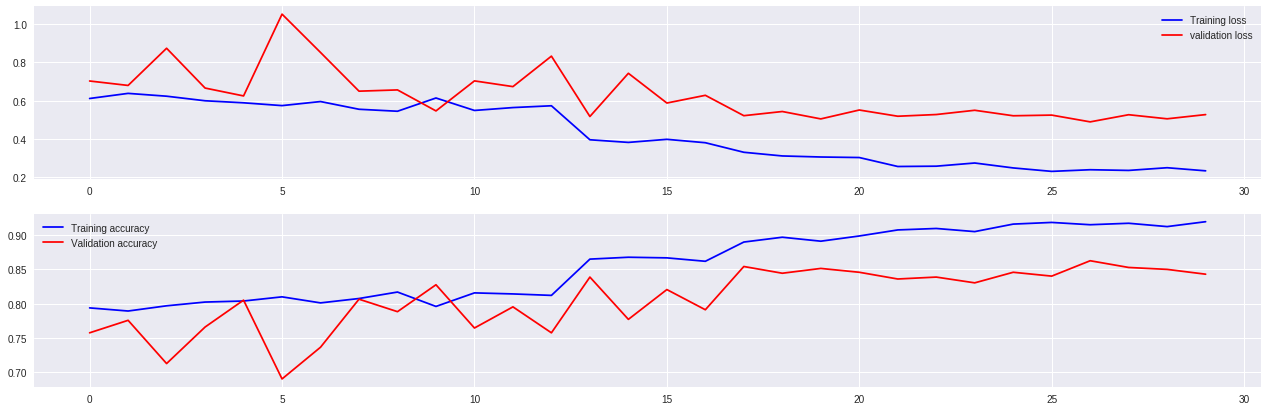

In [42]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
#prediction = model.predict(X_test)

# Confusion Matrix

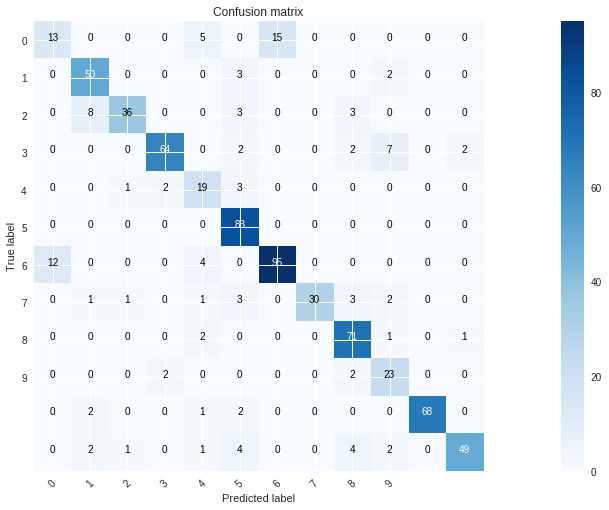

In [45]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
Predicted_classes = model.predict_classes(X_test)


In [0]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [48]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [0]:
i = 10

Predicted class: Fat Hen
Actual class: Cleavers


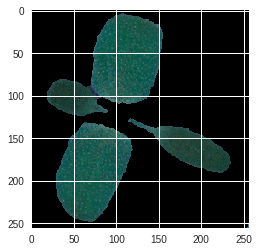

In [50]:
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])

In [51]:
enc.inverse_transform(np.array([y_test[10]]))

array(['Cleavers'], dtype='<U25')

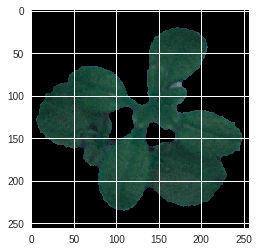

In [52]:
plt.imshow(X_test[10])

In [53]:
enc.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')